In [1]:
import pandas as pd
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [4]:
import string

In [5]:
import re

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stemmer = nltk.SnowballStemmer("english")

In [8]:
data = pd.read_csv("tiktok_google_play_reviews.csv")

C:\Users\gokib\AppData\Local\Temp\ipykernel_26964\1729668089.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tiktok_google_play_reviews.csv")


In [9]:
data.head()

reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating but I litera...      1              0   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5              0   
4                                Pictures and record      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  
0               27.1.3  2022-11-29 21:55:37          NaN       NaN  
1                  NaN  2022-11-29 21:55:04          NaN       NaN  
2               27.1.3  2022-11-29 21:54:48          NaN       NaN  
3                  NaN  2022-11-29 21:54:35          NaN       NaN  
4                  NaN  2022-11-29 21:54:21          NaN       NaN

In [10]:
data = data[["content", "score"]]
data.head()

content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5

In [11]:
print(data.isnull().sum())

content    31
score       0
dtype: int64


In [12]:
data = data.dropna()

In [13]:
data.head()

content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5

In [14]:
data.isnull().sum()

content    0
score      0
dtype: int64

In [15]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gokib\AppData\Local\Temp\ipykernel_26964\2467037720.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\gokib\AppData\Local\Temp\ipykernel_26964\2467037720.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\gokib\AppData\Local\Temp\ipykernel_26964\2467037720.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [16]:
clean("I like this bucket challenge")

'like bucket challeng'

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460256 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460256 non-null  object
 1   score    460256 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


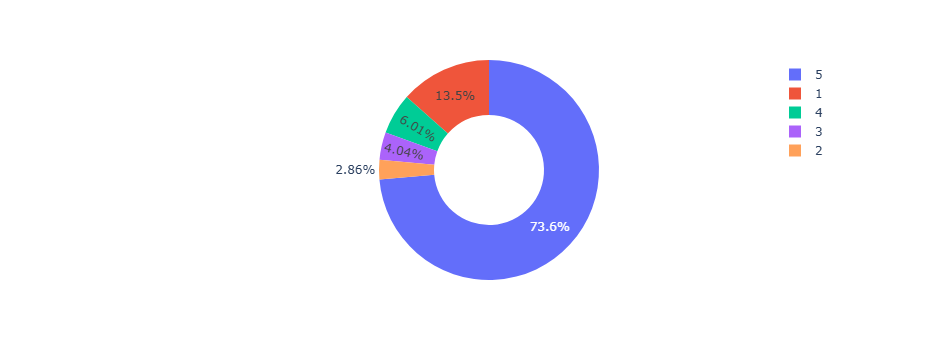

In [18]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

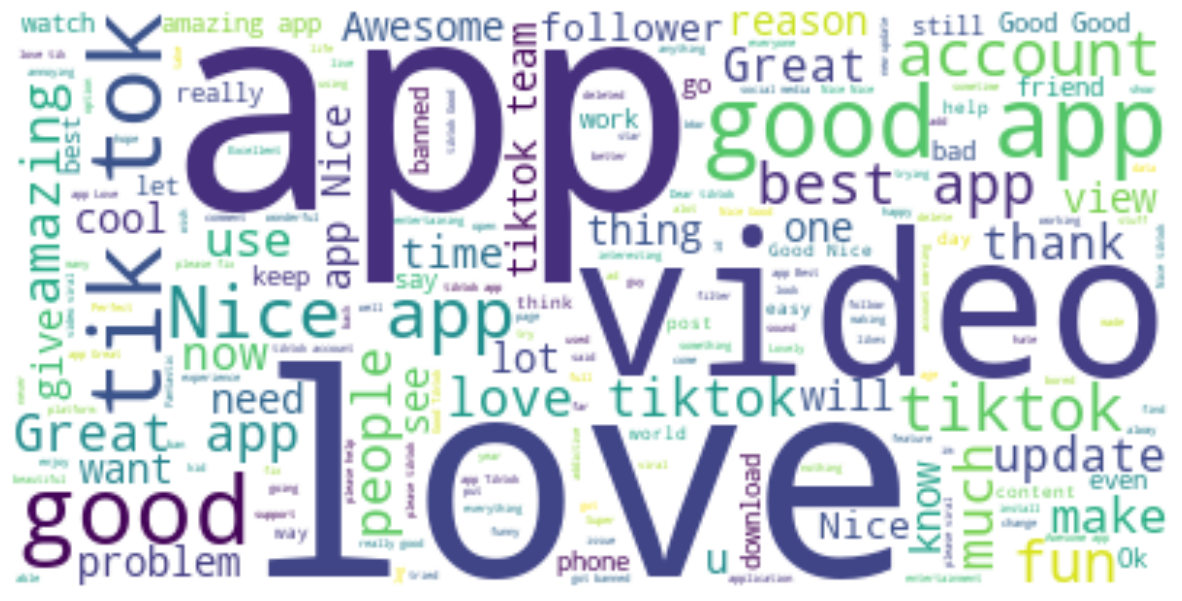

In [19]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gokib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


content  Positive  Negative  \
0                                           No words     0.000     0.688   
1                              Great fun app so far!     0.719     0.000   
2  The app would get a higher rating but I litera...     0.000     0.073   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...     0.561     0.000   
4                                Pictures and record     0.000     0.000   

   Neutral  
0    0.312  
1    0.281  
2    0.927  
3    0.439  
4    1.000

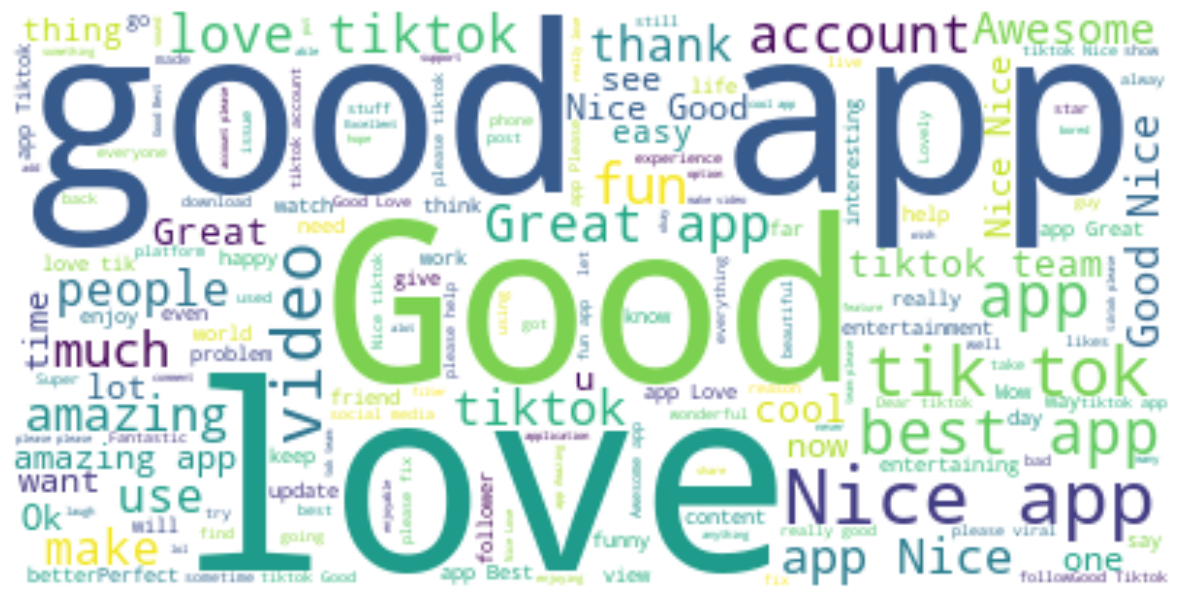

In [21]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

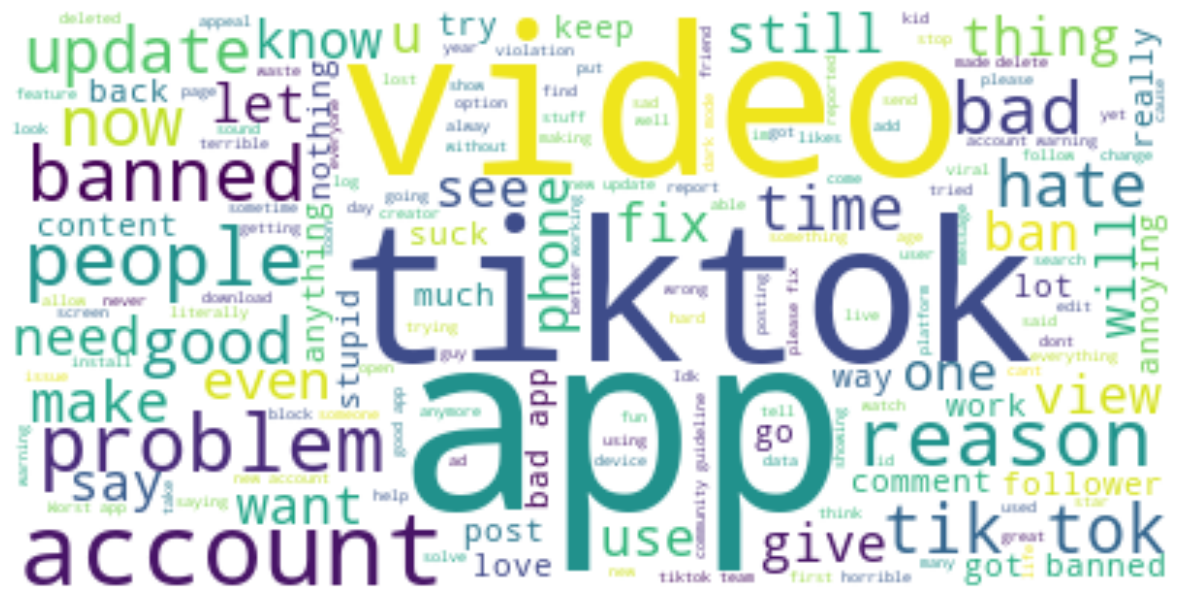

In [22]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [24]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  196353.479
Negative:  16512.736
Neutral:  244154.793


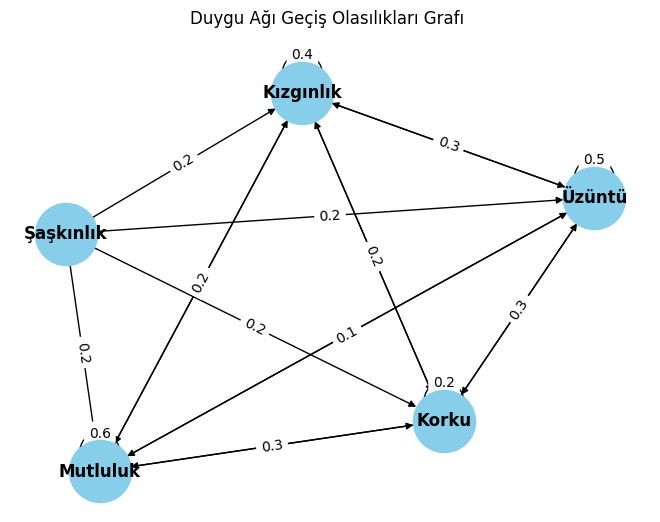

In [25]:
duygular = ['Mutluluk', 'Üzüntü', 'Kızgınlık', 'Korku','Şaşkınlık']


gecis_olasiliklari = {
    'Mutluluk': {'Mutluluk': 0.6, 'Üzüntü': 0.2, 'Kızgınlık': 0.1, 'Korku': 0.1},
    'Üzüntü': {'Mutluluk': 0.1, 'Üzüntü': 0.5, 'Kızgınlık': 0.2, 'Korku': 0.2},
    'Kızgınlık': {'Mutluluk': 0.2, 'Üzüntü': 0.3, 'Kızgınlık': 0.4, 'Korku': 0.1},
    'Korku': {'Mutluluk': 0.3, 'Üzüntü': 0.3, 'Kızgınlık': 0.2, 'Korku': 0.2},
    'Şaşkınlık': {'Mutluluk': 0.2, 'Üzüntü': 0.2, 'Kızgınlık': 0.2, 'Korku': 0.2} 
}


G = nx.DiGraph()


G.add_nodes_from(duygular)


for duygu, olasiliklar in gecis_olasiliklari.items():
    for hedef_duygu, olasilik in olasiliklar.items():
        G.add_edge(duygu, hedef_duygu, weight=olasilik)


pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')


labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


plt.title("Duygu Ağı Geçiş Olasılıkları Grafı ")
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

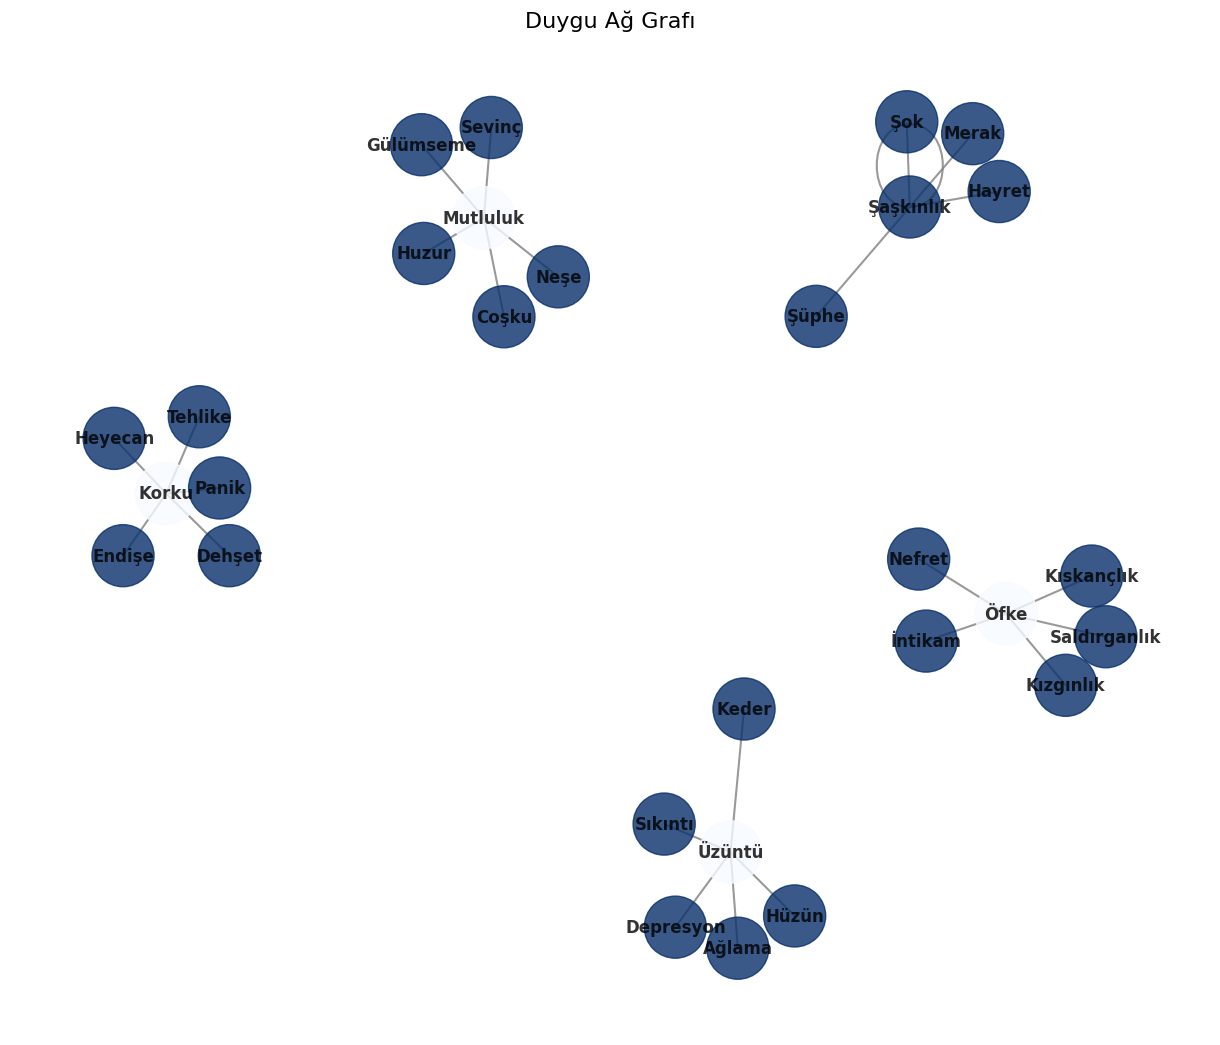

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


duygu_iliskileri = {
    "Mutluluk": ["Sevinç", "Neşe", "Huzur", "Gülümseme", "Coşku"],
    "Üzüntü": ["Hüzün", "Depresyon", "Keder", "Sıkıntı", "Ağlama"],
    "Öfke": ["Kızgınlık", "Nefret", "Kıskançlık", "İntikam", "Saldırganlık"],
    "Korku": ["Endişe", "Heyecan", "Tehlike", "Panik", "Dehşet"],
    "Şaşkınlık": ["Şaşkınlık", "Hayret", "Merak", "Şok", "Şüphe"]
}


tum_duygular = [duygu for duygular in duygu_iliskileri.values() for duygu in duygular]
duygu_frekanslari = Counter(tum_duygular)
min_frequency = min(duygu_frekanslari.values())
max_frequency = max(duygu_frekanslari.values())


G = nx.Graph()


for duygu in duygu_iliskileri:
    G.add_node(duygu, frequency=duygu_frekanslari[duygu])


for duygu, iliskiler in duygu_iliskileri.items():
    for iliski in iliskiler:
        G.add_edge(duygu, iliski)


if min_frequency != max_frequency:
    node_size_map = [2000 * (duygu_frekanslari[node] - min_frequency) / (max_frequency - min_frequency) + 1000 for node in G.nodes()]
else:
    node_size_map = [2000 for _ in G.nodes()]  
node_color_map = [duygu_frekanslari[node] for node in G.nodes()]


plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.3)  
nx.draw(G, pos, with_labels=True, node_size=node_size_map, node_color=node_color_map,
        cmap=plt.cm.Blues, font_size=12, font_weight='bold', edge_color='gray', width=1.5, alpha=0.8)
plt.title("Duygu Ağ Grafı", fontsize=16)
plt.colorbar(label="Duygu Frekansı")
plt.show()
